In [1]:
from google.colab import files, drive
drive.mount('/content/gdrive')

Go to this URL in a browser: https://accounts.google.com/o/oauth2/auth?client_id=947318989803-6bn6qk8qdgf4n4g3pfee6491hc0brc4i.apps.googleusercontent.com&redirect_uri=urn%3aietf%3awg%3aoauth%3a2.0%3aoob&scope=email%20https%3a%2f%2fwww.googleapis.com%2fauth%2fdocs.test%20https%3a%2f%2fwww.googleapis.com%2fauth%2fdrive%20https%3a%2f%2fwww.googleapis.com%2fauth%2fdrive.photos.readonly%20https%3a%2f%2fwww.googleapis.com%2fauth%2fpeopleapi.readonly&response_type=code

Enter your authorization code:
··········
Mounted at /content/gdrive


In [ ]:
import os

#!pip install pytorch_pretrained_bert==0.4.0
os.chdir("/content/gdrive/My Drive/KorBERT")

In [ ]:
from google.colab import files

uploaded = files.upload()

Saving labeled_new_0831_1003.xlsx to labeled_new_0831_1003.xlsx


In [ ]:
import pandas as pd
df = pd.read_excel("labeled_new_0831_1003.xlsx")

In [ ]:
df.head()

,media,a_num,title,content,w_num,c_source,a_source,s_num,v_num,nf_verb,s_verb,reporter,non_text,s_rate,quality
0,경기일보,329412764,"105만 고양시 발전 이끌어온 서기관 6명, 아름다운 퇴장","송주현 기자 왼쪽 위부터)김운용, 이현옥, 이흥민, 노양호, 정종현, 신승일 \r\...",1176,6,1,18,16,0,8,1,0,50.0,1
1,경기일보,329412768,고양시 새해에는 교통난 해결될까 관심,송주현 기자 \r\n고양시민들이 출·퇴근길 겪고 있는 교통 불편이 새해에는 개선될 ...,1197,3,1,14,16,0,6,1,0,37.5,1
2,경기일보,329412771,"안양시, 오는 2022년까지 일자리 10만6천개 창출 목표",박준상 기자 \r\n기해년을 맞은 안양시가 향후 4년간 일자리 10만6천여개 창출을...,884,2,0,9,10,0,0,1,0,0.0,1
3,경기일보,329412773,"오명근 의원, 평택 고평지구 학군조정을 위한 의견수렴 간담회 개최",최현호 기자 \r\n경기도의회 건설교통위원회 소속 오명근 의원(더불어민주당ㆍ평택4)...,759,9,3,9,10,0,2,1,0,20.0,1
4,경기일보,329412774,"화성시, 2020년까지 신규 일자리 13만개 창출...일자리 대책 청사진 공개",홍완식 기자 \r\n화성시가 새해를 맞아 민선7기 지역맞춤형 일자리 대책의 청사진을...,937,2,0,8,8,0,0,1,0,0.0,1


In [ ]:
import re

In [ ]:
# 텍스트 특수부호 제거

def cleaned_text(text):
  import re
  #text = re.sub('\W+',' ',text)
  text = text.replace(' \\r','.')
  text = text.replace('\\r','.')
  text = text.replace('\\n','.')
  
  return text


def cleaned(text):
  text = cleaned_text(text)
  for i in range(2,20):
    text = text.replace('.'*i,'.')
    
  return text

def preprocess(text):
  _filter = re.compile('[^가-힣 0-9 a-z A-Z \@ \( \) \. \, \' \" \! \?]+')
  text = _filter.sub('', text)
  return text

df['content1'] = df['content'].apply(lambda x : cleaned(x))
df['content1'] = df['content1'].apply(lambda x : preprocess(x))
df['content1'] = df.content1.apply(lambda x : x.replace('.','. '))


a_ls = []
for content in df['content1']:
  clean = preprocess(content)
  a_ls.append(clean)

df['content1'] = a_ls

In [ ]:
import collections       # OrderedDict를 위해 호출
import re                # 정규표현식
import unicodedata       # 한국어 정준분해 및 문자열 확인
import six               # Python version 체크
import tensorflow as tf  # Tensorflow 파일 불러오기 및 logging
import urllib3
import json

In [ ]:
vocab_file = 'vocab.korean_morp.list'
#api_key = 'c149fccd-6639-4026-9fb8-cec175ff934c'

api_key = 'f3639d57-7635-4bd9-93b0-6eae550ab90e'

In [ ]:
def do_lang ( openapi_key, text ) :
    openApiURL = "http://aiopen.etri.re.kr:8000/WiseNLU"
	 
    requestJson = { "access_key": openapi_key, "argument": { "text": text, "analysis_code": "morp" } }
	 
    http = urllib3.PoolManager()
    response = http.request( "POST", openApiURL, headers={"Content-Type": "application/json; charset=UTF-8"}, body=json.dumps(requestJson))
    
    json_data = json.loads(response.data.decode('utf-8'))
    json_result = json_data["result"]
    
    if json_result == -1:
        json_reason = json_data["reason"]
        if "Invalid Access Key" in json_reason:
            logger.info(json_reason)
            logger.info("Please check the openapi access key.")
            sys.exit()
        return "openapi error - " + json_reason      
    else:
        json_data = json.loads(response.data.decode('utf-8'))
    
        json_return_obj = json_data["return_object"]
        
        return_result = ""
        json_sentence = json_return_obj["sentence"]
        for json_morp in json_sentence:                        
            for morp in json_morp["morp"]:
                return_result = return_result+str(morp["lemma"])+"/"+str(morp["type"])+" "

        return return_result

In [ ]:
import urllib3
import json

In [ ]:
from tokenization_morp import FullTokenizer

In [ ]:
# FullTokenizer
ftk = FullTokenizer(vocab_file, do_lower_case=False)

In [ ]:
df.content1[0]

'송주현 기자 왼쪽 위부터)김운용, 이현옥, 이흥민, 노양호, 정종현, 신승일. 특례시 지정을 앞둔 105만 고양시의 발전을 위해 땀과 열정을 쏟아온 6명의 공직자(서기관)들이 아름다운 퇴장을 앞두고 있다. 경기북부의 중심도시인 고양시가 되기까지 쉼없이 달려왔던 이들은 이제 후배들에게 자리를 물려주고 인생 2막을 준비 중이다. 김운용 고양시 푸른도시사업소장은 1983년 공직에 입문해 고양시가 자연을 품은 도시가 될 수 있도록 많은 연구와 노력을 기울여왔다.  지난 28일 명예퇴직한 그는 산림보호유공을 인정받아 받은 산림청장표창을 비롯해, 국무총리와 국방부장관, 도지사 표창들이 묵묵히 업무에 충실해 온 그의 공직생활을 보여준다. 40년 세월동안 고양시를 지켜온 이현옥 교육문화국장도 공직을 마무리하기 위해 공로연수에 들어간다.  부드럽고 섬세한 그의 업무스타일은 후배들에게도 많은 신뢰와 박수를 받아왔다. 정부부처 등으로부터 표창을 13회나 받은 이흥민 민생경제국장 역시 고양시에게는 아까운 인재다.  그는 고양지역 주민들이 원활한 생활지원을 받을 수 있도록 늘 주민들과 함께하며 고양시 행정에 현장의 목소리를 담아왔다. 노양호 여성가족국장도 고양지역 발전을 위해 40년 넘게 예산법무과 등 주요부서에서 활약해 왔다.  특히 교육지원과장 시절에는 고양지역 학생들의 교육환경 개선을 위해 노력을 아끼지 않았다. 농업 분야 전문가인 정종현 농업기술센터소장도 고양지역의 농업이 활성화되기까지 많은 자취를 남겼다.  2016년에는 녹조근정훈장 영예를 받기도 했다. 신승일 시민안전주택국장도 이들과 함께 공로연수에 들어간다.  신 국장은 경기북부 중심 도시가 된 고양시의 미래설계를 담당해 온 일등 공신 인물이다.  그동안 고양시 발전을 위해서는 해당 업무를 담당하는 공직자 역시 계속적인 발전이 필요하다고 강조해 온 그는 2011년에는 경희대에서 경영학을 전공하고 2014년에는 고려대에서 건축공학과 석사과정을 마쳤다.  풍부한 학식과 오랜 행정경험을 통해 쌓은 노하우, 업무를 추진하는 

In [ ]:
print(ftk.tokenize(do_lang(api_key,df.content1[0])))

['송', '주', '현/NNP_', '기자/NNG_', '왼쪽/NNG_', '위/NNG_', '부터/JX_', ')/SS_', '김', '운', '용/NNP_', ',/SP_', '이현', '옥/NNP_', ',/SP_', '이', '흥', '민/NNP_', ',/SP_', '노', '양', '호/NNP_', ',/SP_', '정', '종', '현/NNP_', ',/SP_', '신', '승', '일/NNP_', './SF_', '특례/NNG_', '시/NNB_', '지정/NNG_', '을/JKO_', '앞두/VV_', 'ㄴ/ETM_', '105/SN_', '만/NR_', '고양', '시/NNP_', '의/JKG_', '발전/NNG_', '을/JKO_', '위하/VV_', '어/EC_', '땀/NNG_', '과/JC_', '열정/NNG_', '을/JKO_', '쏟/VV_', '아/EC_', '오/VX_', 'ㄴ/ETM_', '6/SN_', '명/NNB_', '의/JKG_', '공직/NNG_', '자/XSN_', '(/SS_', '서기/NNG_', '관/XSN_', ')/SS_', '들/XSN_', '이/JKS_', '아름/NNG_', '답/XSA_', 'ㄴ/ETM_', '퇴장/NNG_', '을/JKO_', '앞두/VV_', '고/EC_', '있/VX_', '다/EF_', './SF_', '경기/NNP_', '북부/NNG_', '의/JKG_', '중심/NNG_', '도시/NNG_', '이/VCP_', 'ㄴ/ETM_', '고양', '시/NNP_', '가/JKC_', '되/VV_', '기/ETN_', '까지/JX_', '쉼', '/VV_', '없이/MAG_', '달려오/VV_', '았/EP_', '던/ETM_', '이/NP_', '들/XSN_', '은/JX_', '이제/MAG_', '후배/NNG_', '들/XSN_', '에게/JKB_', '자리/NNG_', '를/JKO_', '물', '려주/VV_', '고/EC_', '인생/NNG_', '2/SN_', '막', '/

In [ ]:
def convert_to_unicode(text):
    # Python version이 3.x일 때,
    # type(text)이 `bytes`일 경우, utf-8로 변환
    if six.PY3:
        if isinstance(text, str):
            return text
        elif isinstance(text, bytes):
            return text.decode("utf-8", "ignore")
        else:
            raise ValueError("Unsupported string type: %s" % (type(text)))
    # Python version이 2.x일 때,
    # type(text)이 `str`일 경우, utf-8로 변환
    elif six.PY2:
        if isinstance(text, str):
            return text.decode("utf-8", "ignore")
        elif isinstance(text, unicode):
            return text
        else:
            raise ValueError("Unsupported string type: %s" % (type(text)))
    # Python 3.x, 2.x만 허용!
    else:
        raise ValueError("Not running on Python2 or Python 3?")
        
        
def _load_vocab(vocab_file):
    # 단어 사전을 저장할 OrderedDict 객체 생성
    vocab = collections.OrderedDict()
    index = 0
    with tf.io.gfile.GFile(vocab_file, 'r') as reader:
        while True:
            # Binary Text를 unicode(utf-8)로 decode.
            token = convert_to_unicode(reader.readline())
            if not token: break
            if ((token.find('n_iters=') == 0) or
                (token.find('max_length=') == 0)):
                continue
            token = token.split('\t')[0]
            token = token.strip()
            # 토큰과 해당 index를 기록
            vocab[token] = index
            index += 1
    return vocab

In [ ]:
type(FullTokenizer(vocab_file,do_lower_case=False).tokenize(text))

list

In [ ]:
import numpy as np

In [ ]:
df.head()

,media,a_num,title,content,w_num,c_source,a_source,s_num,v_num,nf_verb,s_verb,reporter,non_text,s_rate,quality,content1
0,경기일보,329412764,"105만 고양시 발전 이끌어온 서기관 6명, 아름다운 퇴장","송주현 기자 왼쪽 위부터)김운용, 이현옥, 이흥민, 노양호, 정종현, 신승일 \r\...",1176,6,1,18,16,0,8,1,0,50.0,1,"송주현 기자 왼쪽 위부터)김운용, 이현옥, 이흥민, 노양호, 정종현, 신승일. 특례..."
1,경기일보,329412768,고양시 새해에는 교통난 해결될까 관심,송주현 기자 \r\n고양시민들이 출·퇴근길 겪고 있는 교통 불편이 새해에는 개선될 ...,1197,3,1,14,16,0,6,1,0,37.5,1,송주현 기자. 고양시민들이 출퇴근길 겪고 있는 교통 불편이 새해에는 개선될 수 있을...
2,경기일보,329412771,"안양시, 오는 2022년까지 일자리 10만6천개 창출 목표",박준상 기자 \r\n기해년을 맞은 안양시가 향후 4년간 일자리 10만6천여개 창출을...,884,2,0,9,10,0,0,1,0,0.0,1,박준상 기자. 기해년을 맞은 안양시가 향후 4년간 일자리 10만6천여개 창출을 목표...
3,경기일보,329412773,"오명근 의원, 평택 고평지구 학군조정을 위한 의견수렴 간담회 개최",최현호 기자 \r\n경기도의회 건설교통위원회 소속 오명근 의원(더불어민주당ㆍ평택4)...,759,9,3,9,10,0,2,1,0,20.0,1,최현호 기자. 경기도의회 건설교통위원회 소속 오명근 의원(더불어민주당평택4)은 지난...
4,경기일보,329412774,"화성시, 2020년까지 신규 일자리 13만개 창출...일자리 대책 청사진 공개",홍완식 기자 \r\n화성시가 새해를 맞아 민선7기 지역맞춤형 일자리 대책의 청사진을...,937,2,0,8,8,0,0,1,0,0.0,1,홍완식 기자. 화성시가 새해를 맞아 민선7기 지역맞춤형 일자리 대책의 청사진을 공개...


In [ ]:
from tqdm import tqdm

In [ ]:
morph_vocab = _load_vocab(vocab_file)

In [ ]:
import numpy as np



def toktok1(df):


  maxlen = 512

  ipt_ids1 = []
  ipt_ids2 = []
  ipt_ids3 = []
  ipt_ids4 = []
  ipt_ids5 = []

  ipt_mask1 = []
  ipt_mask2 = []
  ipt_mask3 = []
  ipt_mask4 = []
  ipt_mask5 = []
   
  sgm_ids1 = []
  sgm_ids2 = []
  sgm_ids3 = []
  sgm_ids4 = []
  sgm_ids5 = []


  
  for content in tqdm(df['content1']):
    text = do_lang(api_key, content)
    split_tokens = ftk.tokenize(text)
    k = round(len(split_tokens)/5)
    spt1 = split_tokens[:k]
    spt2 = split_tokens[k:(2*k)]
    spt3 = split_tokens[(2*k):(3*k)]
    spt4 = split_tokens[(3*k):]
    spt5 = split_tokens[(4*k):]

    tokens1 = ["[CLS]"] + spt1 + ["[SEP]"]
    tokens2 = ["[CLS]"] + spt2 + ["[SEP]"]
    tokens3 = ["[CLS]"] + spt3 + ["[SEP]"]
    tokens4 = ["[CLS]"] + spt4 + ["[SEP]"]
    tokens5 = ["[CLS]"] + spt5 + ["[SEP]"]

    input_ids1 = [morph_vocab[token] for token in tokens1]
    input_ids2 = [morph_vocab[token] for token in tokens2]
    input_ids3 = [morph_vocab[token] for token in tokens3]
    input_ids4 = [morph_vocab[token] for token in tokens4]
    input_ids5 = [morph_vocab[token] for token in tokens5]

    input_mask1 = [1] * len(input_ids1)
    input_mask2 = [1] * len(input_ids2)
    input_mask3 = [1] * len(input_ids3)
    input_mask4 = [1] * len(input_ids4)
    input_mask5 = [1] * len(input_ids5)

    segment_ids1 = [0] * len(tokens1)
    segment_ids2 = [0] * len(tokens2)
    segment_ids3 = [0] * len(tokens3)
    segment_ids4 = [0] * len(tokens4)
    segment_ids5 = [0] * len(tokens5)
    
    padding1 = [0] * (maxlen - len(input_ids1))
    padding2 = [0] * (maxlen - len(input_ids2))
    padding3 = [0] * (maxlen - len(input_ids3))
    padding4 = [0] * (maxlen - len(input_ids4))
    padding5 = [0] * (maxlen - len(input_ids5))
  
    input_ids1 += padding1
    input_ids2 += padding2
    input_ids3 += padding3
    input_ids4 += padding4
    input_ids5 += padding5
    
    input_mask1 += padding1
    input_mask2 += padding2
    input_mask3 += padding3
    input_mask4 += padding4
    input_mask5 += padding5

    segment_ids1 += padding1
    segment_ids2 += padding2
    segment_ids3 += padding3
    segment_ids4 += padding4
    segment_ids5 += padding5

    ipt_ids1.append(input_ids1) # 토큰
    ipt_ids2.append(input_ids2)
    ipt_ids3.append(input_ids3)
    ipt_ids4.append(input_ids4)
    ipt_ids5.append(input_ids5)

    ipt_mask1.append(input_mask1)
    ipt_mask2.append(input_mask2)
    ipt_mask3.append(input_mask3)
    ipt_mask4.append(input_mask4)
    ipt_mask5.append(input_mask5)


    sgm_ids1.append(segment_ids1) # 문장 분류
    sgm_ids2.append(segment_ids2)
    sgm_ids3.append(segment_ids3)
    sgm_ids4.append(segment_ids4)
    sgm_ids5.append(segment_ids5)


  ar_tok1 = np.array(ipt_ids1)
  ar_tok2 = np.array(ipt_ids2)
  ar_tok3 = np.array(ipt_ids3)
  ar_tok4 = np.array(ipt_ids4)
  ar_tok5 = np.array(ipt_ids5)


  ar_seg1 = np.array(sgm_ids1)
  ar_seg2 = np.array(sgm_ids2)
  ar_seg3 = np.array(sgm_ids3)
  ar_seg4 = np.array(sgm_ids4)
  ar_seg5 = np.array(sgm_ids5)
    
    
  train_x = [[ar_tok1[:900], ar_tok2[:900], ar_tok3[:900], ar_tok4[:900], ar_tok5[:900]], [ar_seg1[:900], ar_seg2[:900], ar_seg3[:900], ar_seg4[:900], ar_seg5[:900]]]

  test_x = [[ar_tok1[900:], ar_tok2[900:], ar_tok3[900:], ar_tok4[900:], ar_tok5[900:]], [ar_seg1[900:], ar_seg2[900:], ar_seg3[900:], ar_seg4[900:], ar_seg5[900:]]]

  y = df['quality']
  train_y = np.array(y[:900])
  test_y = np.array(y[900:])

  return train_x, test_x, train_y, test_y

In [ ]:
train_x, test_x, train_y, test_y = toktok1(df)

100%|██████████| 1003/1003 [07:15<00:00,  2.30it/s]


In [ ]:
len(train_x[1][1])

900

In [ ]:
!pip install keras-bert

  Created wheel for keras-bert: filename=keras_bert-0.86.0-cp36-none-any.whl size=34145 sha256=6cfb541b1d75c4e33b0b4897f3705df0ffd5a5c98b20298346f8475b051710bd
  Stored in directory: /root/.cache/pip/wheels/66/f0/b1/748128b58562fc9e31b907bb5e2ab6a35eb37695e83911236b
  Created wheel for keras-transformer: filename=keras_transformer-0.38.0-cp36-none-any.whl size=12942 sha256=e08b8cda4f903041234937233dfebab54bcb5fd21df902decd10a17a42eed47d
  Stored in directory: /root/.cache/pip/wheels/e5/fb/3a/37b2b9326c799aa010ae46a04ddb04f320d8c77c0b7e837f4e
  Created wheel for keras-pos-embd: filename=keras_pos_embd-0.11.0-cp36-none-any.whl size=7554 sha256=da5c886a9ead72ea9b4f310819a1534a34d585ffd5708c59bf859334fb52019d
  Stored in directory: /root/.cache/pip/wheels/5b/a1/a0/ce6b1d49ba1a9a76f592e70cf297b05c96bc9f418146761032
  Created wheel for keras-multi-head: filename=keras_multi_head-0.27.0-cp36-none-any.whl size=15612 sha256=f977625422cd472753d632cde17e0da5fb49ae3f7229f2b312ef6bc6435aa697
  Stor

In [ ]:
import keras_bert

In [ ]:
#!pip install keras-bert

from keras.models import Model
from keras import layers
from keras import Input
from keras_bert import load_trained_model_from_checkpoint, load_vocabulary
#from keras_bert import Tokenizer
from keras_bert import AdamWarmup, calc_train_steps
#from transformers import *

#from keras_radam import RAdam


config_path = '/content/gdrive/My Drive/KorBERT/bert_config.json'
checkpoint_path = '/content/gdrive/My Drive/KorBERT/model.ckpt'
SEQ_LEN = 512

layer_num = 12

model = load_trained_model_from_checkpoint(
    config_path,
    checkpoint_path,
    training=True,
    trainable=True,
    seq_len=SEQ_LEN,)
#model = TFBertForPreTraining.from_pretrained(checkpoint_path)
#model = TFBertModel.from_pretrained(checkpoint_path, from_pt=True)
#token_inputs = tf.keras.layers.Input((SEQ_LEN,), dtype=tf.int32, name='input_word_ids')
#mask_inputs = tf.keras.layers.Input((SEQ_LEN,), dtype=tf.int32, name='input_masks')
#segment_inputs = tf.keras.layers.Input((SEQ_LEN,), dtype=tf.int32, name='input_segment')
#bert_outputs = model([token_inputs, mask_inputs, segment_inputs])

In [ ]:
model.summary()

Model: "functional_1"
__________________________________________________________________________________________________
Layer (type)                    Output Shape         Param #     Connected to                     
Input-Token (InputLayer)        [(None, 512)]        0                                            
__________________________________________________________________________________________________
Input-Segment (InputLayer)      [(None, 512)]        0                                            
__________________________________________________________________________________________________
Embedding-Token (TokenEmbedding [(None, 512, 768), ( 23308032    Input-Token[0][0]                
__________________________________________________________________________________________________
Embedding-Segment (Embedding)   (None, 512, 768)     1536        Input-Segment[0][0]              
_______________________________________________________________________________________

In [ ]:
from keras import optimizers

In [ ]:
def get_bert_finetuning_model(model):
  inputs = model.inputs[:2]
  dense = model.layers[-3].output


  outputs = keras.layers.Dense(1, activation='sigmoid',kernel_initializer=keras.initializers.TruncatedNormal(stddev=0.02),
                              name = 'real_output')(dense)



  bert_model = keras.models.Model(inputs, outputs)
  bert_model.compile(
      optimizer=tf.keras.optimizers.Adam(),
      loss='binary_crossentropy',
      metrics=['accuracy'])
  
  return bert_model

In [ ]:
#!pip install keras
import keras

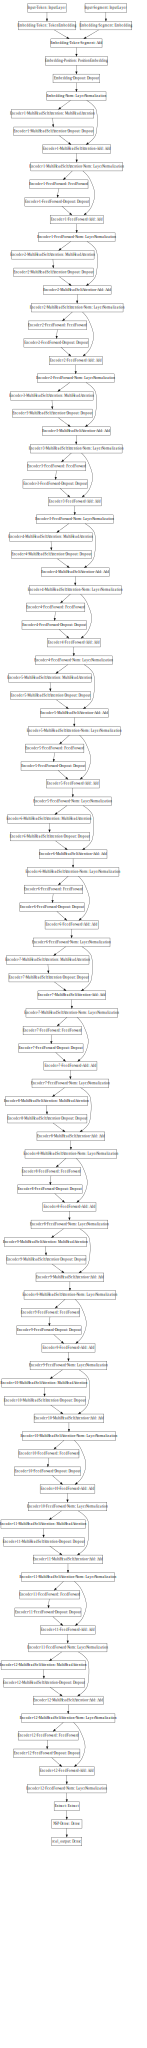

In [ ]:
from IPython.display import SVG
from keras.utils import model_to_dot


SVG(model_to_dot(get_bert_finetuning_model(model), dpi=65).create(prog='dot', format='svg'))

In [ ]:
len(test_x[0][0])

103

In [ ]:
import keras

In [ ]:
bert_model = get_bert_finetuning_model(model)

In [ ]:
bert_model.summary()

Model: "functional_3"
__________________________________________________________________________________________________
Layer (type)                    Output Shape         Param #     Connected to                     
Input-Token (InputLayer)        [(None, 512)]        0                                            
__________________________________________________________________________________________________
Input-Segment (InputLayer)      [(None, 512)]        0                                            
__________________________________________________________________________________________________
Embedding-Token (TokenEmbedding [(None, 512, 768), ( 23308032    Input-Token[0][0]                
__________________________________________________________________________________________________
Embedding-Segment (Embedding)   (None, 512, 768)     1536        Input-Segment[0][0]              
_______________________________________________________________________________________

In [ ]:
bert_model = get_bert_finetuning_model(model)
history = bert_model.fit([train_x[0][0],train_x[1][0]], train_y, epochs=3, batch_size=4, verbose = 1, validation_split=0.1)

Epoch 1/3
203/203 [==============================] - 264s 1s/step - loss: 0.7371 - accuracy: 0.5037 - val_loss: 0.7082 - val_accuracy: 0.4000
Epoch 2/3
203/203 [==============================] - 258s 1s/step - loss: 0.7321 - accuracy: 0.5062 - val_loss: 0.6913 - val_accuracy: 0.6000
Epoch 3/3
203/203 [==============================] - 259s 1s/step - loss: 0.7467 - accuracy: 0.4790 - val_loss: 0.7249 - val_accuracy: 0.4000


In [ ]:
bert_model = get_bert_finetuning_model(model)
history = bert_model.fit([train_x[0][0],train_x[1][0]], train_y, epochs=5, batch_size=8, verbose = 1, validation_data=([test_x[0][0],test_x[1][0]], test_y))

Epoch 1/5


In [ ]:
bert_model1 = get_bert_finetuning_model(model)
history = bert_model1.fit([train_x[0][0],train_x[1][0]], train_y, epochs=10, batch_size=8, verbose = 1, validation_data=([test_x[0][0],test_x[1][0]], test_y))

Epoch 1/10
113/113 [==============================] - 148s 1s/step - loss: 0.7107 - accuracy: 0.5067 - val_loss: 0.7087 - val_accuracy: 0.4563
Epoch 2/10
113/113 [==============================] - 144s 1s/step - loss: 0.7338 - accuracy: 0.5100 - val_loss: 0.7065 - val_accuracy: 0.5437
Epoch 3/10
113/113 [==============================] - 144s 1s/step - loss: 0.7237 - accuracy: 0.5178 - val_loss: 0.7000 - val_accuracy: 0.5437
Epoch 4/10
113/113 [==============================] - 144s 1s/step - loss: 0.7236 - accuracy: 0.4889 - val_loss: 0.6902 - val_accuracy: 0.5437
Epoch 5/10
113/113 [==============================] - 144s 1s/step - loss: 0.7100 - accuracy: 0.5000 - val_loss: 0.7071 - val_accuracy: 0.5437
Epoch 6/10
113/113 [==============================] - 144s 1s/step - loss: 0.7307 - accuracy: 0.4867 - val_loss: 0.6893 - val_accuracy: 0.5437
Epoch 7/10
113/113 [==============================] - 144s 1s/step - loss: 0.7320 - accuracy: 0.5156 - val_loss: 0.6931 - val_accuracy: 0.5437

In [ ]:
bert_model2 = get_bert_finetuning_model(model)
history = bert_model2.fit([train_x[0][0],train_x[1][0]], train_y, epochs=10, batch_size=4, verbose = 1, validation_data=([test_x[0][0],test_x[1][0]], test_y),
                          callbacks=[tf.keras.callbacks.EarlyStopping(monitor='val_accuracy')])

Epoch 1/10
225/225 [==============================] - 280s 1s/step - loss: 0.7404 - accuracy: 0.4922 - val_loss: 0.7186 - val_accuracy: 0.4563
Epoch 2/10
225/225 [==============================] - 274s 1s/step - loss: 0.7349 - accuracy: 0.5133 - val_loss: 0.7309 - val_accuracy: 0.4563


In [ ]:
bert_model2 = get_bert_finetuning_model(model)
history = bert_model2.fit([train_x[0][0],train_x[1][0]], train_y, epochs=10, batch_size=4, verbose = 1, validation_data=([test_x[0][0],test_x[1][0]], test_y))

TypeError: ignored

In [ ]:
import matplotlib.pyplot as plt

In [ ]:
model_loss = history.history['val_loss']
model_accuracy = history.history['val_accuracy']
epochs = range(1, 11)
plt.plot(epochs, model_accuracy, 'b+', label='korbert_model_accuracy')
plt.plot(epochs, model_loss, 'ro', label='korbert_model_loss')
plt.xlabel('Epochs')
#plt.ylabel('Validation loss')
plt.legend()

plt.show()

NameError: ignored

In [ ]:
bert_model = get_bert_finetuning_model(model)
history = bert_model.fit([train_x[0][0],train_x[1][0]], train_y, epochs=2, batch_size=8, verbose = 1)

Epoch 1/2
113/113 [==============================] - 142s 1s/step - loss: 0.8274 - accuracy: 0.4844
Epoch 2/2
113/113 [==============================] - 141s 1s/step - loss: 0.7450 - accuracy: 0.5067


In [ ]:
aa=df['content1'].astype('str')
#type(aa[0])

type(df['content1'][0])

str

### KoBERT

In [ ]:
!pip install transformers

In [ ]:
import logging
import os
import unicodedata
from shutil import copyfile

from transformers import PreTrainedTokenizer


logger = logging.getLogger(__name__)

VOCAB_FILES_NAMES = {"vocab_file": "tokenizer_78b3253a26.model",
                     "vocab_txt": "vocab.txt"}

PRETRAINED_VOCAB_FILES_MAP = {
    "vocab_file": {
        "monologg/kobert": "https://s3.amazonaws.com/models.huggingface.co/bert/monologg/kobert/tokenizer_78b3253a26.model",
        "monologg/kobert-lm": "https://s3.amazonaws.com/models.huggingface.co/bert/monologg/kobert-lm/tokenizer_78b3253a26.model",
        "monologg/distilkobert": "https://s3.amazonaws.com/models.huggingface.co/bert/monologg/distilkobert/tokenizer_78b3253a26.model"
    },
    "vocab_txt": {
        "monologg/kobert": "https://s3.amazonaws.com/models.huggingface.co/bert/monologg/kobert/vocab.txt",
        "monologg/kobert-lm": "https://s3.amazonaws.com/models.huggingface.co/bert/monologg/kobert-lm/vocab.txt",
        "monologg/distilkobert": "https://s3.amazonaws.com/models.huggingface.co/bert/monologg/distilkobert/vocab.txt"
    }
}

PRETRAINED_POSITIONAL_EMBEDDINGS_SIZES = {
    "monologg/kobert": 512,
    "monologg/kobert-lm": 512,
    "monologg/distilkobert": 512
}

PRETRAINED_INIT_CONFIGURATION = {
    "monologg/kobert": {"do_lower_case": False},
    "monologg/kobert-lm": {"do_lower_case": False},
    "monologg/distilkobert": {"do_lower_case": False}
}

SPIECE_UNDERLINE = u'▁'


class KoBertTokenizer(PreTrainedTokenizer):
    """
        SentencePiece based tokenizer. Peculiarities:
            - requires `SentencePiece <https://github.com/google/sentencepiece>`_
    """
    vocab_files_names = VOCAB_FILES_NAMES
    pretrained_vocab_files_map = PRETRAINED_VOCAB_FILES_MAP
    pretrained_init_configuration = PRETRAINED_INIT_CONFIGURATION
    max_model_input_sizes = PRETRAINED_POSITIONAL_EMBEDDINGS_SIZES

    def __init__(
            self,
            vocab_file,
            vocab_txt,
            do_lower_case=False,
            remove_space=True,
            keep_accents=False,
            unk_token="[UNK]",
            sep_token="[SEP]",
            pad_token="[PAD]",
            cls_token="[CLS]",
            mask_token="[MASK]",
            **kwargs):
        super().__init__(
            unk_token=unk_token,
            sep_token=sep_token,
            pad_token=pad_token,
            cls_token=cls_token,
            mask_token=mask_token,
            **kwargs
        )

        # Build vocab
        self.token2idx = dict()
        self.idx2token = []
        with open(vocab_txt, 'r', encoding='utf-8') as f:
            for idx, token in enumerate(f):
                token = token.strip()
                self.token2idx[token] = idx
                self.idx2token.append(token)

        self.max_len_single_sentence = self.max_len - 2  # take into account special tokens
        self.max_len_sentences_pair = self.max_len - 3  # take into account special tokens

        try:
            import sentencepiece as spm
        except ImportError:
            logger.warning("You need to install SentencePiece to use KoBertTokenizer: https://github.com/google/sentencepiece"
                           "pip install sentencepiece")

        self.do_lower_case = do_lower_case
        self.remove_space = remove_space
        self.keep_accents = keep_accents
        self.vocab_file = vocab_file
        self.vocab_txt = vocab_txt

        self.sp_model = spm.SentencePieceProcessor()
        self.sp_model.Load(vocab_file)

    @property
    def vocab_size(self):
        return len(self.idx2token)

    def __getstate__(self):
        state = self.__dict__.copy()
        state["sp_model"] = None
        return state

    def __setstate__(self, d):
        self.__dict__ = d
        try:
            import sentencepiece as spm
        except ImportError:
            logger.warning("You need to install SentencePiece to use KoBertTokenizer: https://github.com/google/sentencepiece"
                           "pip install sentencepiece")
        self.sp_model = spm.SentencePieceProcessor()
        self.sp_model.Load(self.vocab_file)

    def preprocess_text(self, inputs):
        if self.remove_space:
            outputs = " ".join(inputs.strip().split())
        else:
            outputs = inputs
        outputs = outputs.replace("``", '"').replace("''", '"')

        if not self.keep_accents:
            outputs = unicodedata.normalize('NFKD', outputs)
            outputs = "".join([c for c in outputs if not unicodedata.combining(c)])
        if self.do_lower_case:
            outputs = outputs.lower()

        return outputs

    def _tokenize(self, text, return_unicode=True, sample=False):
        """ Tokenize a string. """
        text = self.preprocess_text(text)

        if not sample:
            pieces = self.sp_model.EncodeAsPieces(text)
        else:
            pieces = self.sp_model.SampleEncodeAsPieces(text, 64, 0.1)
        new_pieces = []
        for piece in pieces:
            if len(piece) > 1 and piece[-1] == str(",") and piece[-2].isdigit():
                cur_pieces = self.sp_model.EncodeAsPieces(piece[:-1].replace(SPIECE_UNDERLINE, ""))
                if piece[0] != SPIECE_UNDERLINE and cur_pieces[0][0] == SPIECE_UNDERLINE:
                    if len(cur_pieces[0]) == 1:
                        cur_pieces = cur_pieces[1:]
                    else:
                        cur_pieces[0] = cur_pieces[0][1:]
                cur_pieces.append(piece[-1])
                new_pieces.extend(cur_pieces)
            else:
                new_pieces.append(piece)

        return new_pieces

    def _convert_token_to_id(self, token):
        """ Converts a token (str/unicode) in an id using the vocab. """
        return self.token2idx.get(token, self.token2idx[self.unk_token])

    def _convert_id_to_token(self, index, return_unicode=True):
        """Converts an index (integer) in a token (string/unicode) using the vocab."""
        return self.idx2token[index]

    def convert_tokens_to_string(self, tokens):
        """Converts a sequence of tokens (strings for sub-words) in a single string."""
        out_string = "".join(tokens).replace(SPIECE_UNDERLINE, " ").strip()
        return out_string

    def build_inputs_with_special_tokens(self, token_ids_0, token_ids_1=None):
        """
        Build model inputs from a sequence or a pair of sequence for sequence classification tasks
        by concatenating and adding special tokens.
        A RoBERTa sequence has the following format:
            single sequence: [CLS] X [SEP]
            pair of sequences: [CLS] A [SEP] B [SEP]
        """
        if token_ids_1 is None:
            return [self.cls_token_id] + token_ids_0 + [self.sep_token_id]
        cls = [self.cls_token_id]
        sep = [self.sep_token_id]
        return cls + token_ids_0 + sep + token_ids_1 + sep

    def get_special_tokens_mask(self, token_ids_0, token_ids_1=None, already_has_special_tokens=False):
        """
        Retrieves sequence ids from a token list that has no special tokens added. This method is called when adding
        special tokens using the tokenizer ``prepare_for_model`` or ``encode_plus`` methods.
        Args:
            token_ids_0: list of ids (must not contain special tokens)
            token_ids_1: Optional list of ids (must not contain special tokens), necessary when fetching sequence ids
                for sequence pairs
            already_has_special_tokens: (default False) Set to True if the token list is already formated with
                special tokens for the model
        Returns:
            A list of integers in the range [0, 1]: 0 for a special token, 1 for a sequence token.
        """

        if already_has_special_tokens:
            if token_ids_1 is not None:
                raise ValueError(
                    "You should not supply a second sequence if the provided sequence of "
                    "ids is already formated with special tokens for the model."
                )
            return list(map(lambda x: 1 if x in [self.sep_token_id, self.cls_token_id] else 0, token_ids_0))

        if token_ids_1 is not None:
            return [1] + ([0] * len(token_ids_0)) + [1] + ([0] * len(token_ids_1)) + [1]
        return [1] + ([0] * len(token_ids_0)) + [1]

    def create_token_type_ids_from_sequences(self, token_ids_0, token_ids_1=None):
        """
        Creates a mask from the two sequences passed to be used in a sequence-pair classification task.
        A BERT sequence pair mask has the following format:
        0 0 0 0 0 0 0 0 0 0 1 1 1 1 1 1 1 1 1 1 1
        | first sequence    | second sequence
        if token_ids_1 is None, only returns the first portion of the mask (0's).
        """
        sep = [self.sep_token_id]
        cls = [self.cls_token_id]
        if token_ids_1 is None:
            return len(cls + token_ids_0 + sep) * [0]
        return len(cls + token_ids_0 + sep) * [0] + len(token_ids_1 + sep) * [1]

    def save_vocabulary(self, save_directory):
        """ Save the sentencepiece vocabulary (copy original file) and special tokens file
            to a directory.
        """
        if not os.path.isdir(save_directory):
            logger.error("Vocabulary path ({}) should be a directory".format(save_directory))
            return

        # 1. Save sentencepiece model
        out_vocab_model = os.path.join(save_directory, VOCAB_FILES_NAMES["vocab_file"])

        if os.path.abspath(self.vocab_file) != os.path.abspath(out_vocab_model):
            copyfile(self.vocab_file, out_vocab_model)

        # 2. Save vocab.txt
        index = 0
        out_vocab_txt = os.path.join(save_directory, VOCAB_FILES_NAMES["vocab_txt"])
        with open(out_vocab_txt, "w", encoding="utf-8") as writer:
            for token, token_index in sorted(self.token2idx.items(), key=lambda kv: kv[1]):
                if index != token_index:
                    logger.warning(
                        "Saving vocabulary to {}: vocabulary indices are not consecutive."
                        " Please check that the vocabulary is not corrupted!".format(out_vocab_txt)
                    )
                    index = token_index
                writer.write(token + "\n")
                index += 1

        return out_vocab_model, out_vocab_txt

In [ ]:
tokenizer = KoBertTokenizer.from_pretrained('monologg/kobert')

Setting 'max_len_single_sentence' is now deprecated. This value is automatically set up.
Setting 'max_len_sentences_pair' is now deprecated. This value is automatically set up.


In [ ]:
print(tokenizer.encode("보는내내 그대로 들어맞는 예측 카리스마 없는 악역"))

[2, 2366, 5678, 5678, 1192, 1804, 6166, 5760, 3415, 4638, 3272, 3133, 6926, 3]


In [ ]:
print(tokenizer.tokenize("보는내내 그대로 들어맞는 예측 카리스마 없는 악역"))

['▁보는', '내', '내', '▁그대로', '▁들어', '맞', '는', '▁예측', '▁카리스마', '▁없는', '▁악', '역']


In [ ]:
print(tokenizer.tokenize(df['content1'][0]))

['▁송', '주', '현', '▁', '기자', '▁왼쪽', '▁위', '부터', ')', '김', '운', '용', ',', '▁이', '현', '옥', ',', '▁이', '흥', '민', ',', '▁노', '양', '호', ',', '▁정', '종', '현', ',', '▁신', '승', '일', '.', '▁특', '례', '시', '▁지정', '을', '▁앞둔', '▁10', '5', '만', '▁고양', '시', '의', '▁발전', '을', '▁위해', '▁', '땀', '과', '▁열정', '을', '▁쏟아', '온', '▁6', '명의', '▁공', '직', '자', '(', '서', '기관', ')', '들이', '▁아름다운', '▁퇴', '장을', '▁앞두고', '▁있다', '.', '▁경기', '북부', '의', '▁중심', '도시', '인', '▁고양', '시', '가', '▁', '되기', '까지', '▁', '쉼', '없이', '▁달려', '왔던', '▁이들은', '▁이제', '▁후', '배', '들에게', '▁자리를', '▁물', '려', '주', '고', '▁인생', '▁2', '막', '을', '▁준비', '▁중이다', '.', '▁김', '운', '용', '▁고양', '시', '▁푸', '른', '도시', '사업', '소', '장은', '▁19', '83', '년', '▁공', '직', '에', '▁입', '문', '해', '▁고양', '시', '가', '▁자연', '을', '▁품', '은', '▁도시', '가', '▁될', '▁수', '▁있도록', '▁많은', '▁연구', '와', '▁노력을', '▁기울', '여', '왔다', '.', '▁지난', '▁28', '일', '▁명예', '퇴', '직', '한', '▁그는', '▁산', '림', '보호', '유', '공', '을', '▁인정받', '아', '▁받은', '▁산', '림', '청', '장', '표', '창', '을', '▁비롯해', ',', '▁국무총리', '와',

In [ ]:
print(tokenizer.encode("전율을 일으키는 영화. 다시 보고싶은 영화", max_length=64, pad_to_max_length=True))

Truncation was not explicitely activated but `max_length` is provided a specific value, please use `truncation=True` to explicitely truncate examples to max length. Defaulting to 'longest_first' truncation strategy. If you encode pairs of sequences (GLUE-style) with the tokenizer you can select this strategy more precisely by providing a specific strategy to `truncation`.


[2, 4012, 7071, 3815, 5760, 3394, 54, 1574, 2358, 6751, 7086, 3394, 3, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1]


In [ ]:
# 세그멘트 인풋
print([0]*64)

[0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0]


In [ ]:
valid_num = len(tokenizer.encode("전율을 일으키는 영화. 다시 보고싶은 영화"))
print(valid_num * [1] + (64 - valid_num) * [0])

[1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0]


In [ ]:
print(len(tokenizer.encode("전율을 일으키는 영화. 다시 보고싶은 영화")))

13


In [ ]:
def convert_data(data_df):
    global tokenizer
    
    SEQ_LEN = 512 #SEQ_LEN : 버트에 들어갈 인풋의 길이
    
    tokens, masks, segments, targets = [], [], [], []
    
    for i in tqdm(range(len(data_df))):
        # token : 문장을 토큰화함
        token = tokenizer.encode(data_df[DATA_COLUMN][i], max_length=SEQ_LEN, pad_to_max_length=True)
       
        # 마스크는 토큰화한 문장에서 패딩이 아닌 부분은 1, 패딩인 부분은 0으로 통일
        num_zeros = token.count(0)
        mask = [1]*(SEQ_LEN-num_zeros) + [0]*num_zeros
        
        # 문장의 전후관계를 구분해주는 세그먼트는 문장이 1개밖에 없으므로 모두 0
        segment = [0]*SEQ_LEN

        # 버트 인풋으로 들어가는 token, mask, segment를 tokens, segments에 각각 저장
        tokens.append(token)
        masks.append(mask)
        segments.append(segment)
        
        # 정답(긍정 : 1 부정 0)을 targets 변수에 저장해 줌
        targets.append(data_df[LABEL_COLUMN][i])

    # tokens, masks, segments, 정답 변수 targets를 numpy array로 지정    
    tokens = np.array(tokens)
    masks = np.array(masks)
    segments = np.array(segments)
    targets = np.array(targets)

    return [tokens, masks, segments], targets

# 위에 정의한 convert_data 함수를 불러오는 함수를 정의
def load_data(pandas_dataframe):
    data_df = pandas_dataframe
    data_df[DATA_COLUMN] = data_df[DATA_COLUMN].astype(str)
    data_df[LABEL_COLUMN] = data_df[LABEL_COLUMN].astype(int)
    data_x, data_y = convert_data(data_df)
    return data_x, data_y

SEQ_LEN =512
BATCH_SIZE = 8
# 긍부정 문장을 포함하고 있는 칼럼
DATA_COLUMN = "content1"
# 긍정인지 부정인지를 (1=긍정,0=부정) 포함하고 있는 칼럼
LABEL_COLUMN = "quality"

In [ ]:
df1 = df.loc[:,['content1','quality']]
df1.head()

,content1,quality
0,"송주현 기자 왼쪽 위부터)김운용, 이현옥, 이흥민, 노양호, 정종현, 신승일. 특례...",1
1,송주현 기자. 고양시민들이 출퇴근길 겪고 있는 교통 불편이 새해에는 개선될 수 있을...,1
2,박준상 기자. 기해년을 맞은 안양시가 향후 4년간 일자리 10만6천여개 창출을 목표...,1
3,최현호 기자. 경기도의회 건설교통위원회 소속 오명근 의원(더불어민주당평택4)은 지난...,1
4,홍완식 기자. 화성시가 새해를 맞아 민선7기 지역맞춤형 일자리 대책의 청사진을 공개...,1


In [ ]:
from sklearn.model_selection import train_test_split
train, test = train_test_split(df1, test_size=0.1, random_state=0)

In [ ]:
train = train.reset_index()
train.drop('index', axis=1, inplace=True)
test = test.reset_index()
test.drop('index', axis=1, inplace=True)

In [ ]:
# train 데이터를 버트 인풋에 맞게 변환
train_x, train_y = load_data(train)

  0%|          | 0/902 [00:00<?, ?it/s]Truncation was not explicitely activated but `max_length` is provided a specific value, please use `truncation=True` to explicitely truncate examples to max length. Defaulting to 'longest_first' truncation strategy. If you encode pairs of sequences (GLUE-style) with the tokenizer you can select this strategy more precisely by providing a specific strategy to `truncation`.
Truncation was not explicitely activated but `max_length` is provided a specific value, please use `truncation=True` to explicitely truncate examples to max length. Defaulting to 'longest_first' truncation strategy. If you encode pairs of sequences (GLUE-style) with the tokenizer you can select this strategy more precisely by providing a specific strategy to `truncation`.
Truncation was not explicitely activated but `max_length` is provided a specific value, please use `truncation=True` to explicitely truncate examples to max length. Defaulting to 'longest_first' truncation strat

In [ ]:
test_x, test_y = load_data(test)

  0%|          | 0/101 [00:00<?, ?it/s]Truncation was not explicitely activated but `max_length` is provided a specific value, please use `truncation=True` to explicitely truncate examples to max length. Defaulting to 'longest_first' truncation strategy. If you encode pairs of sequences (GLUE-style) with the tokenizer you can select this strategy more precisely by providing a specific strategy to `truncation`.
Truncation was not explicitely activated but `max_length` is provided a specific value, please use `truncation=True` to explicitely truncate examples to max length. Defaulting to 'longest_first' truncation strategy. If you encode pairs of sequences (GLUE-style) with the tokenizer you can select this strategy more precisely by providing a specific strategy to `truncation`.
Truncation was not explicitely activated but `max_length` is provided a specific value, please use `truncation=True` to explicitely truncate examples to max length. Defaulting to 'longest_first' truncation strat

In [ ]:
from transformers import BertTokenizer, TFBertModel
import tensorflow as tf

In [ ]:
model = TFBertModel.from_pretrained("monologg/kobert", from_pt=True)
# 토큰 인풋, 마스크 인풋, 세그먼트 인풋 정의
token_inputs = tf.keras.layers.Input((SEQ_LEN,), dtype=tf.int32, name='input_word_ids')
mask_inputs = tf.keras.layers.Input((SEQ_LEN,), dtype=tf.int32, name='input_masks')
segment_inputs = tf.keras.layers.Input((SEQ_LEN,), dtype=tf.int32, name='input_segment')
# 인풋이 [토큰, 마스크, 세그먼트]인 모델 정의
bert_outputs = model([token_inputs, mask_inputs, segment_inputs])

All PyTorch model weights were used when initializing TFBertModel.

All the weights of TFBertModel were initialized from the TF 2.0 model.
If your task is similar to the task the model of the ckeckpoint was trained on, you can already use TFBertModel for predictions without further training.


In [ ]:
bert_outputs

(<tf.Tensor 'tf_bert_model/bert/encoder/layer_._11/output/LayerNorm/batchnorm/add_1:0' shape=(None, 512, 768) dtype=float32>,
 <tf.Tensor 'tf_bert_model/bert/pooler/dense/Tanh:0' shape=(None, 768) dtype=float32>)

In [ ]:
bert_outputs = bert_outputs[1]

In [ ]:
import tensorflow_addons as tfa
# 총 batch size * 4 epoch = 2344 * 4
opt = tfa.optimizers.RectifiedAdam(lr=5.0e-5, total_steps = 2344*4, warmup_proportion=0.1, min_lr=1e-5, epsilon=1e-08, clipnorm=1.0)

In [ ]:
5e-5 == 0.00005

True

In [ ]:
sentiment_drop = tf.keras.layers.Dropout(0.5)(bert_outputs)
sentiment_first = tf.keras.layers.Dense(1, activation='sigmoid', kernel_initializer=tf.keras.initializers.TruncatedNormal(stddev=0.02))(sentiment_drop)
sentiment_model = tf.keras.Model([token_inputs, mask_inputs, segment_inputs], sentiment_first)
sentiment_model.compile(optimizer=opt, loss=tf.keras.losses.BinaryCrossentropy(), metrics = ['accuracy'])

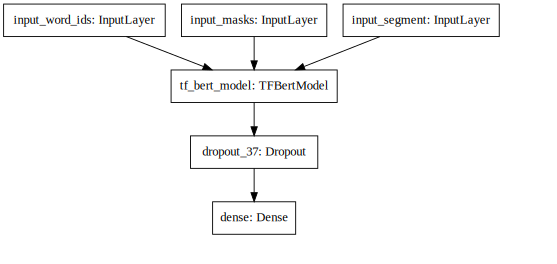

In [ ]:
SVG(model_to_dot(sentiment_model, dpi=65).create(prog='dot', format='svg'))

In [ ]:
train.shape
test.shape

(101, 2)

In [ ]:
1003*0.1

100.30000000000001

In [ ]:
sentiment_model.summary()

Model: "functional_15"
__________________________________________________________________________________________________
Layer (type)                    Output Shape         Param #     Connected to                     
input_word_ids (InputLayer)     [(None, 512)]        0                                            
__________________________________________________________________________________________________
input_masks (InputLayer)        [(None, 512)]        0                                            
__________________________________________________________________________________________________
input_segment (InputLayer)      [(None, 512)]        0                                            
__________________________________________________________________________________________________
tf_bert_model_2 (TFBertModel)   ((None, 512, 768), ( 92186880    input_word_ids[0][0]             
                                                                 input_masks[0][0]    

In [ ]:
sentiment_model.fit(train_x, train_y, epochs=4, shuffle=True, batch_size=64, validation_data=(test_x, test_y))

Epoch 1/4
15/15 [==============================] - 15s 999ms/step - loss: 0.7055 - accuracy: 0.5122 - val_loss: 0.6965 - val_accuracy: 0.4752
Epoch 2/4
15/15 [==============================] - 13s 849ms/step - loss: 0.7054 - accuracy: 0.4922 - val_loss: 0.6958 - val_accuracy: 0.4653
Epoch 3/4
15/15 [==============================] - 12s 824ms/step - loss: 0.6993 - accuracy: 0.5177 - val_loss: 0.6953 - val_accuracy: 0.4752
Epoch 4/4
15/15 [==============================] - 12s 807ms/step - loss: 0.7092 - accuracy: 0.5144 - val_loss: 0.6954 - val_accuracy: 0.4752


In [ ]:
sentiment_model.fit(train_x, train_y, epochs=4, shuffle=True, batch_size=16, validation_data=(test_x, test_y))

Epoch 1/4
57/57 [==============================] - 18s 313ms/step - loss: 0.7039 - accuracy: 0.5122 - val_loss: 0.6868 - val_accuracy: 0.5248
Epoch 2/4
57/57 [==============================] - 18s 320ms/step - loss: 0.7015 - accuracy: 0.4989 - val_loss: 0.6786 - val_accuracy: 0.5743
Epoch 3/4
57/57 [==============================] - 18s 316ms/step - loss: 0.6886 - accuracy: 0.5477 - val_loss: 0.6677 - val_accuracy: 0.5743
Epoch 4/4
57/57 [==============================] - 18s 313ms/step - loss: 0.6823 - accuracy: 0.5576 - val_loss: 0.6639 - val_accuracy: 0.6139


In [ ]:
his = sentiment_model.fit(train_x, train_y, epochs=10, shuffle=True, batch_size=4, validation_data=(test_x, test_y))

Epoch 1/10
226/226 [==============================] - 257s 1s/step - loss: 0.7112 - accuracy: 0.5211 - val_loss: 0.6882 - val_accuracy: 0.5248
Epoch 2/10
226/226 [==============================] - 253s 1s/step - loss: 0.6917 - accuracy: 0.5388 - val_loss: 0.6886 - val_accuracy: 0.5446
Epoch 3/10
226/226 [==============================] - 254s 1s/step - loss: 0.6842 - accuracy: 0.5831 - val_loss: 0.6955 - val_accuracy: 0.5050
Epoch 4/10
226/226 [==============================] - 253s 1s/step - loss: 0.7010 - accuracy: 0.5288 - val_loss: 0.6897 - val_accuracy: 0.5149
Epoch 5/10
226/226 [==============================] - 253s 1s/step - loss: 0.6989 - accuracy: 0.5643 - val_loss: 0.6787 - val_accuracy: 0.5743
Epoch 6/10
226/226 [==============================] - 253s 1s/step - loss: 0.7020 - accuracy: 0.5277 - val_loss: 0.6981 - val_accuracy: 0.5050
Epoch 7/10
226/226 [==============================] - 253s 1s/step - loss: 0.6990 - accuracy: 0.5067 - val_loss: 0.6970 - val_accuracy: 0.4950

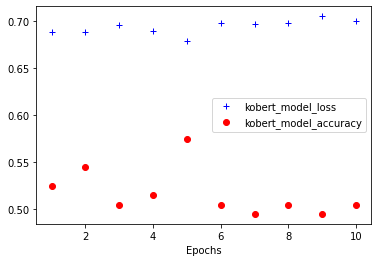

In [ ]:
kobert_model_loss = his.history['val_loss']
kobert_model_accuracy = his.history['val_accuracy']

epochs = range(1, 11)
plt.plot(epochs, kobert_model_loss, 'b+', label='kobert_model_loss')
plt.plot(epochs, kobert_model_accuracy, 'ro', label='kobert_model_accuracy')
plt.xlabel('Epochs')
#plt.ylabel('Validation loss')
plt.legend()

plt.show()

In [ ]:
sentiment_model.fit(train_x, train_y, epochs=10, shuffle=True, batch_size=16, validation_data=(test_x, test_y),
                    callbacks=[tf.keras.callbacks.EarlyStopping(monitor='val_accuracy')])

Epoch 1/10
57/57 [==============================] - 19s 325ms/step - loss: 0.1096 - accuracy: 0.9678 - val_loss: 0.9603 - val_accuracy: 0.7030
Epoch 2/10
57/57 [==============================] - 18s 321ms/step - loss: 0.1952 - accuracy: 0.9290 - val_loss: 1.0312 - val_accuracy: 0.6238


In [ ]:
sentiment_model.fit(train_x, train_y, epochs=5, shuffle=True, batch_size=4, validation_data=(test_x, test_y))

Epoch 1/5
226/226 [==============================] - 258s 1s/step - loss: 0.6996 - accuracy: 0.5344 - val_loss: 0.7130 - val_accuracy: 0.5050
Epoch 2/5
226/226 [==============================] - 252s 1s/step - loss: 0.6968 - accuracy: 0.4956 - val_loss: 0.6739 - val_accuracy: 0.5842
Epoch 3/5
226/226 [==============================] - 253s 1s/step - loss: 0.6916 - accuracy: 0.5477 - val_loss: 0.6521 - val_accuracy: 0.6436
Epoch 4/5
226/226 [==============================] - 252s 1s/step - loss: 0.6939 - accuracy: 0.5532 - val_loss: 0.6988 - val_accuracy: 0.5050
Epoch 5/5
226/226 [==============================] - 252s 1s/step - loss: 0.7003 - accuracy: 0.5333 - val_loss: 0.6625 - val_accuracy: 0.5743


In [ ]:
sentiment_model.fit(train_x, train_y, epochs=5, shuffle=True, batch_size=4, validation_data=(test_x, test_y),
                    callbacks=[tf.keras.callbacks.EarlyStopping(monitor='val_accuracy')])

Epoch 1/5
226/226 [==============================] - 254s 1s/step - loss: 0.6903 - accuracy: 0.5399 - val_loss: 0.6977 - val_accuracy: 0.5446
Epoch 2/5
226/226 [==============================] - 254s 1s/step - loss: 0.6866 - accuracy: 0.5399 - val_loss: 0.6993 - val_accuracy: 0.5743
Epoch 3/5
226/226 [==============================] - 253s 1s/step - loss: 0.7091 - accuracy: 0.5177 - val_loss: 0.6930 - val_accuracy: 0.5050
